In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [1]:
df = pd.read_csv('/kaggle/input/pfeature/EEW_features_2024-10-21.csv')

df.columns

Index([' filename ', ' date ', ' time ', ' Rmag ', ' Rdpth ', ' Rlat ',
       ' Rlon ', ' Station ', ' Sheight ', ' Slat ', ' Slon ', ' RSdistance ',
       ' azimuth ', ' pkev12 ', ' pkev23 ', ' durP ', ' tauPd ', ' tauPt ',
       ' PDd ', ' PVd ', ' PAd ', ' PDt ', ' PVt ', 'PAt ', ' ddt_PDd ',
       ' ddt_PVd ', ' ddt_PAd ', ' ddt_PDt ', ' ddt_PVt ', 'ddt_PAt ', ' PGA ',
       ' PGV ', ' tPGA ', ' tPGV '],
      dtype='object')

In [3]:
data = df[[' pkev12 ', ' pkev23 ', ' durP ', ' tauPd ', ' tauPt ',
       ' PDd ', ' PVd ', ' PAd ', ' PDt ', ' PVt ', 'PAt ', ' ddt_PDd ',
       ' ddt_PVd ', ' ddt_PAd ', ' ddt_PDt ', ' ddt_PVt ', 'ddt_PAt ', ' PGA ']]

data = data.replace([np.inf, -np.inf], np.nan)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25437 entries, 0 to 25436
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0    pkev12    25437 non-null  float64
 1    pkev23    25437 non-null  float64
 2    durP      25437 non-null  float64
 3    tauPd     25437 non-null  float64
 4    tauPt     25437 non-null  float64
 5    PDd       25437 non-null  float64
 6    PVd       25437 non-null  float64
 7    PAd       25437 non-null  float64
 8    PDt       25437 non-null  float64
 9    PVt       25437 non-null  float64
 10  PAt        25437 non-null  float64
 11   ddt_PDd   25437 non-null  float64
 12   ddt_PVd   25437 non-null  float64
 13   ddt_PAd   25437 non-null  float64
 14   ddt_PDt   25437 non-null  object 
 15   ddt_PVt   25437 non-null  object 
 16  ddt_PAt    25437 non-null  object 
 17   PGA       25437 non-null  float64
dtypes: float64(15), object(3)
memory usage: 3.5+ MB


In [5]:
data[' PGA '].describe()

count    25437.000000
mean       118.728420
std        264.499408
min          0.477000
25%          9.655000
50%         32.791000
75%        107.627000
max       6253.012000
Name:  PGA , dtype: float64

In [6]:
#SCALING

data.columns = data.columns.str.strip()
data.loc[:, 'PGA'] = data['PGA'] / 980.665

data['PGA'].describe()

count    25437.000000
mean         0.121069
std          0.269714
min          0.000486
25%          0.009845
50%          0.033438
75%          0.109749
max          6.376298
Name: PGA, dtype: float64

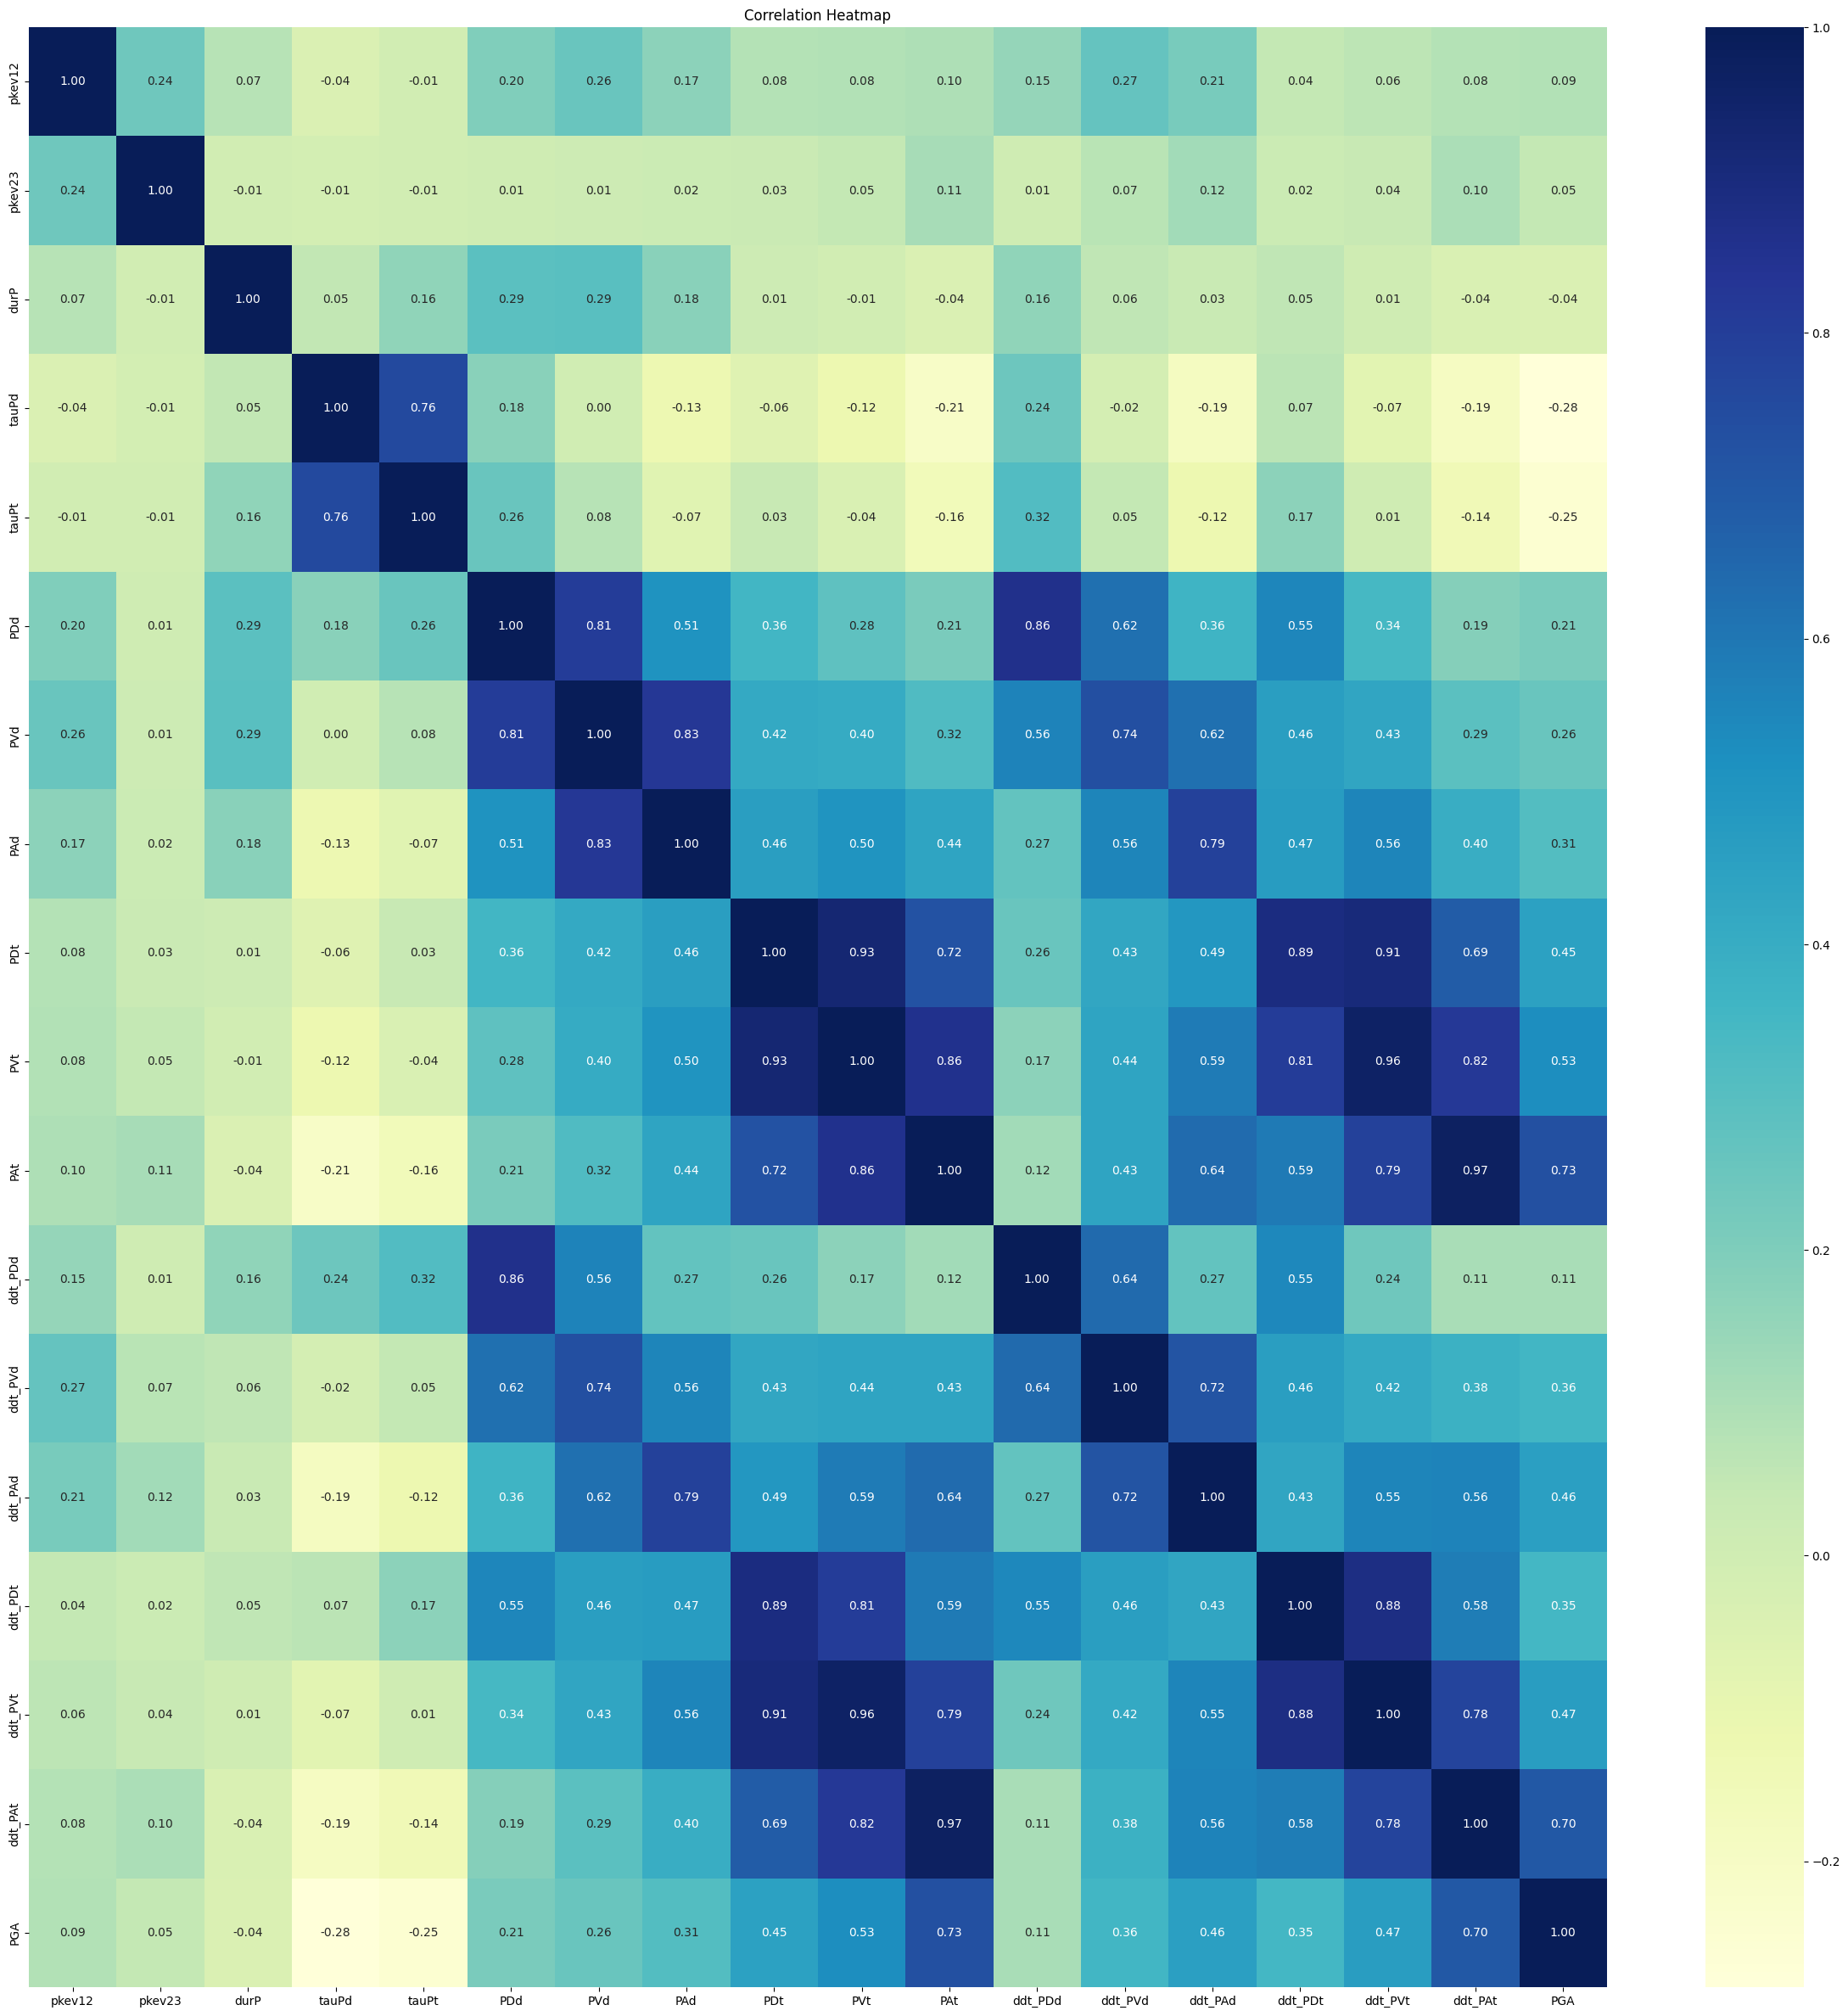

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))

sns.heatmap(data.corr(), fmt=".2f", cmap='YlGnBu', annot=True)

plt.title("Correlation Heatmap")

plt.show()

In [15]:
data.corr()['PGA'].sort_values(ascending=False)

PGA        1.000000
PAt        0.729996
ddt_PAt    0.699489
PVt        0.527991
ddt_PVt    0.468002
ddt_PAd    0.456526
PDt        0.449657
ddt_PVd    0.358191
ddt_PDt    0.349419
PAd        0.311182
PVd        0.258245
PDd        0.210669
ddt_PDd    0.106611
pkev12     0.087867
pkev23     0.045825
durP      -0.040638
tauPt     -0.248332
tauPd     -0.282417
Name: PGA, dtype: float64

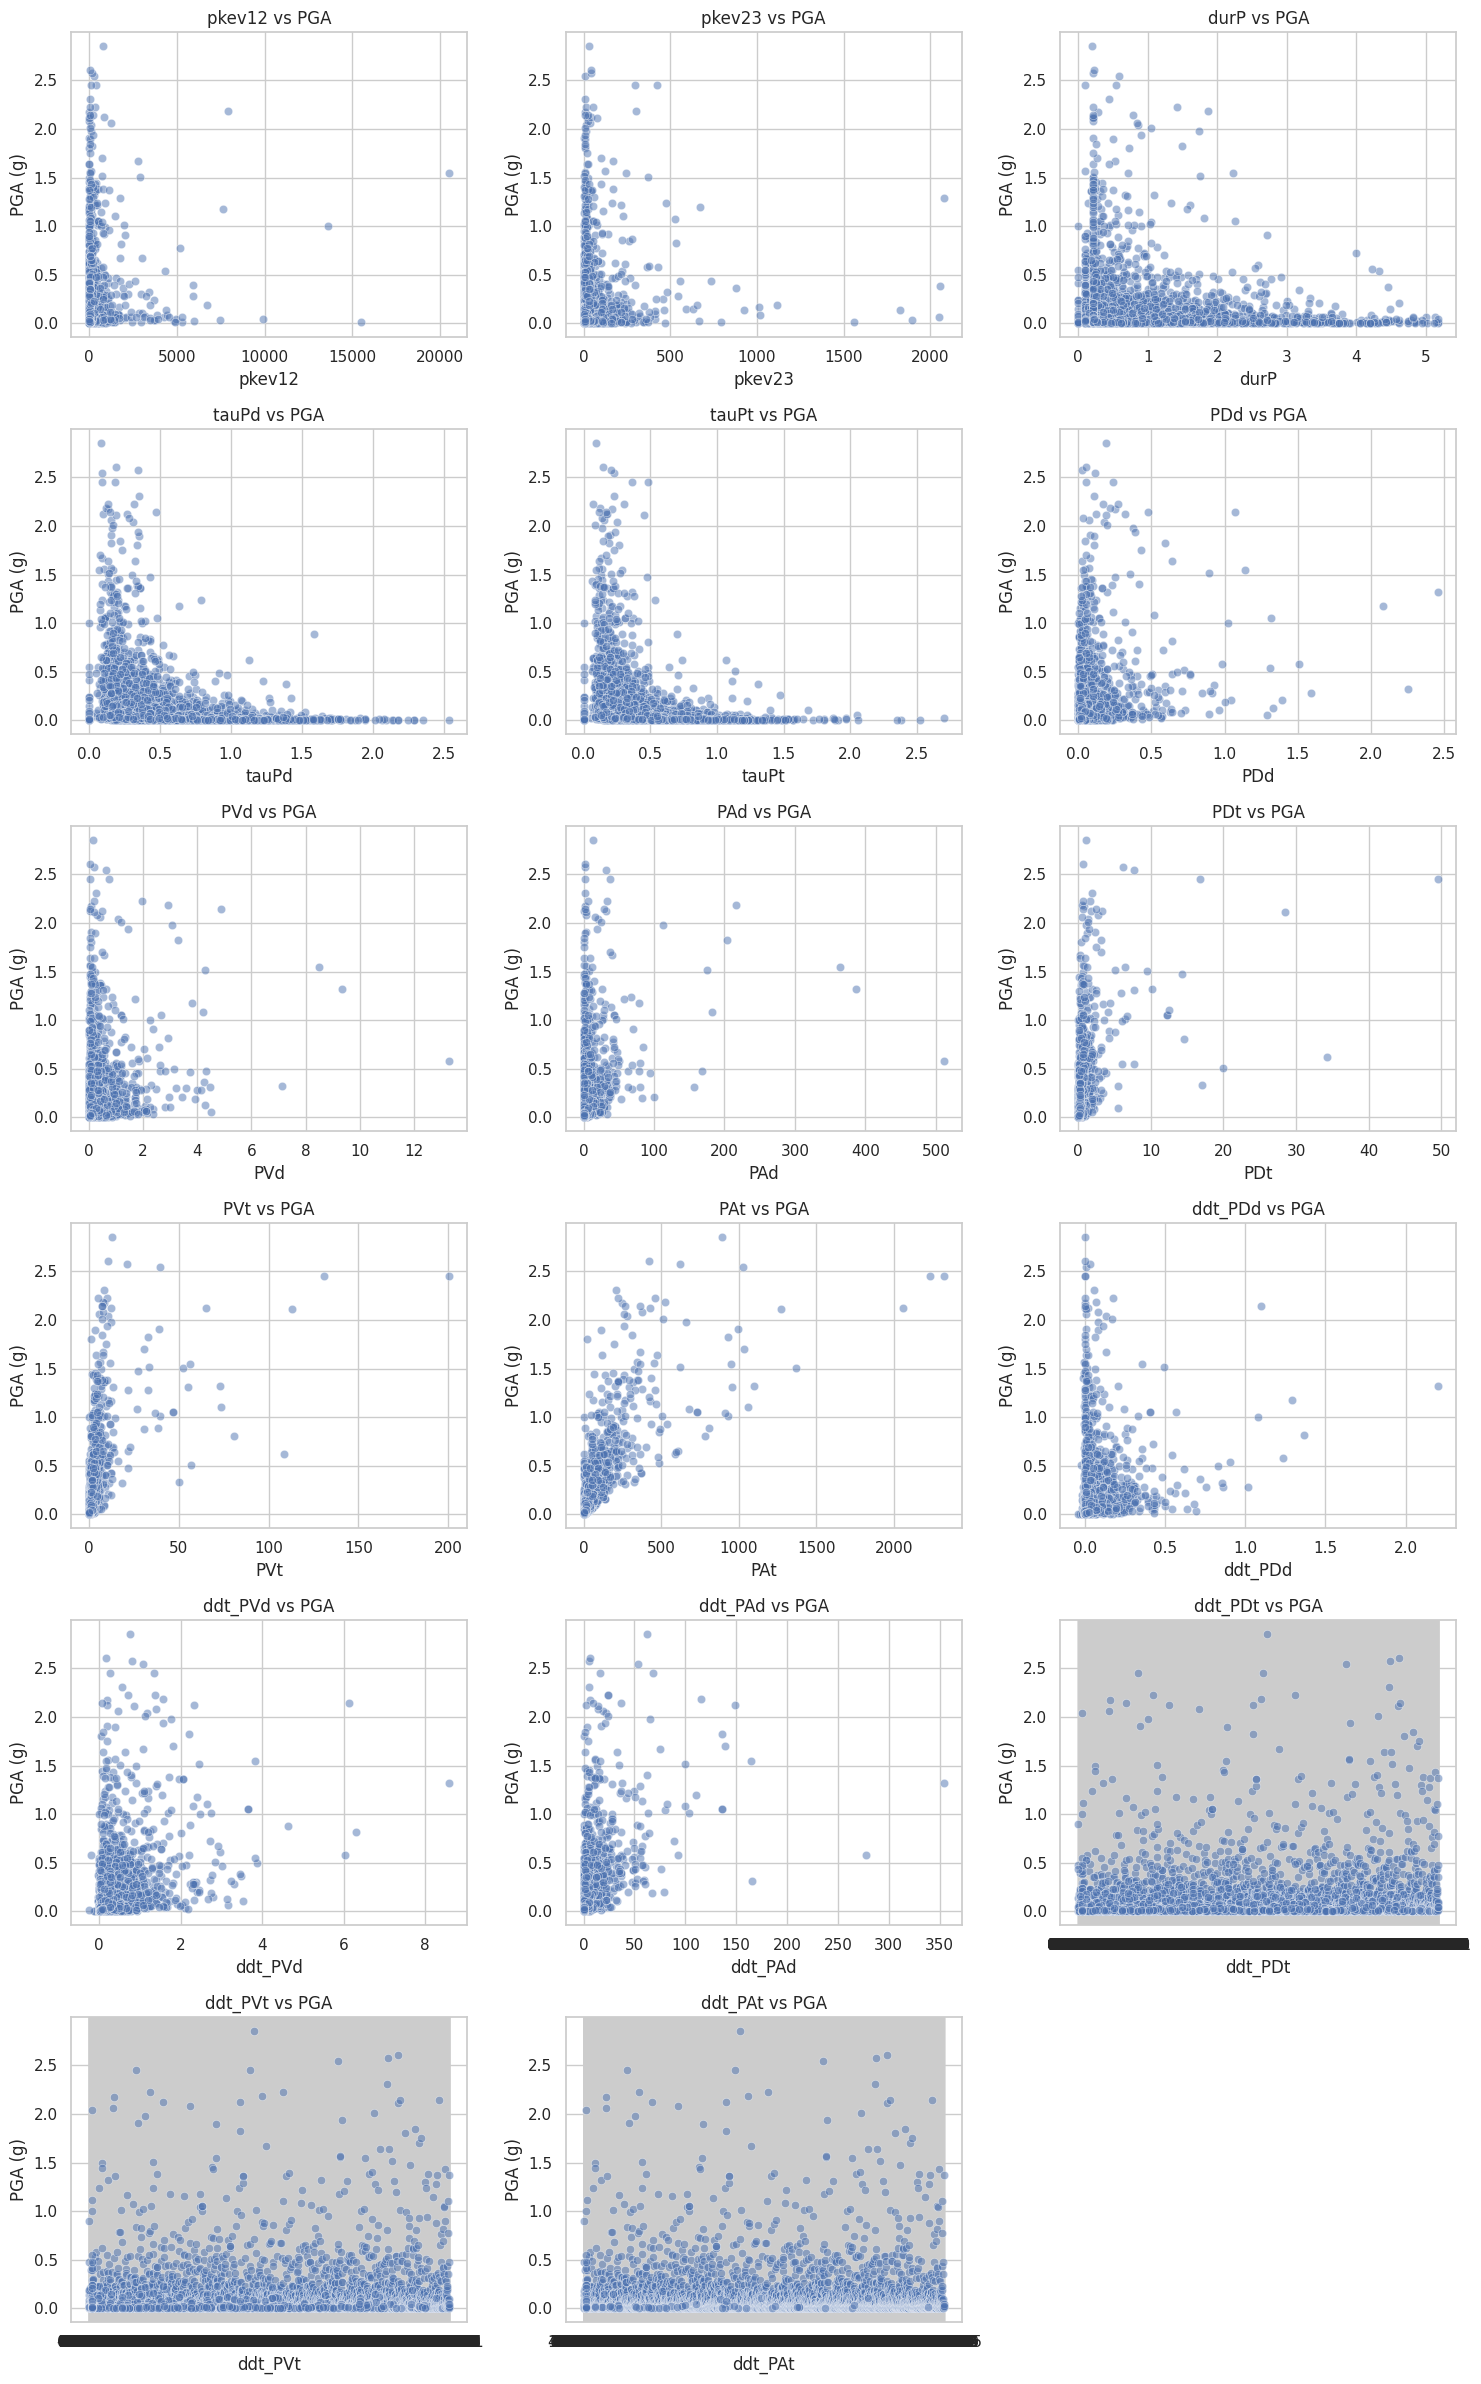

In [16]:
# Sampling
max_points = 5000

if len(data) > max_points:
    plot_data = data.sample(n=max_points, random_state=42)
else:
    plot_data = data.copy()

features = plot_data.columns.tolist()
features.remove('PGA')  # target
target = 'PGA'

sns.set(style="whitegrid")

n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=plot_data[feature], y=plot_data[target],
                    ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('PGA (g)')
    axes[i].set_title(f'{feature} vs PGA')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


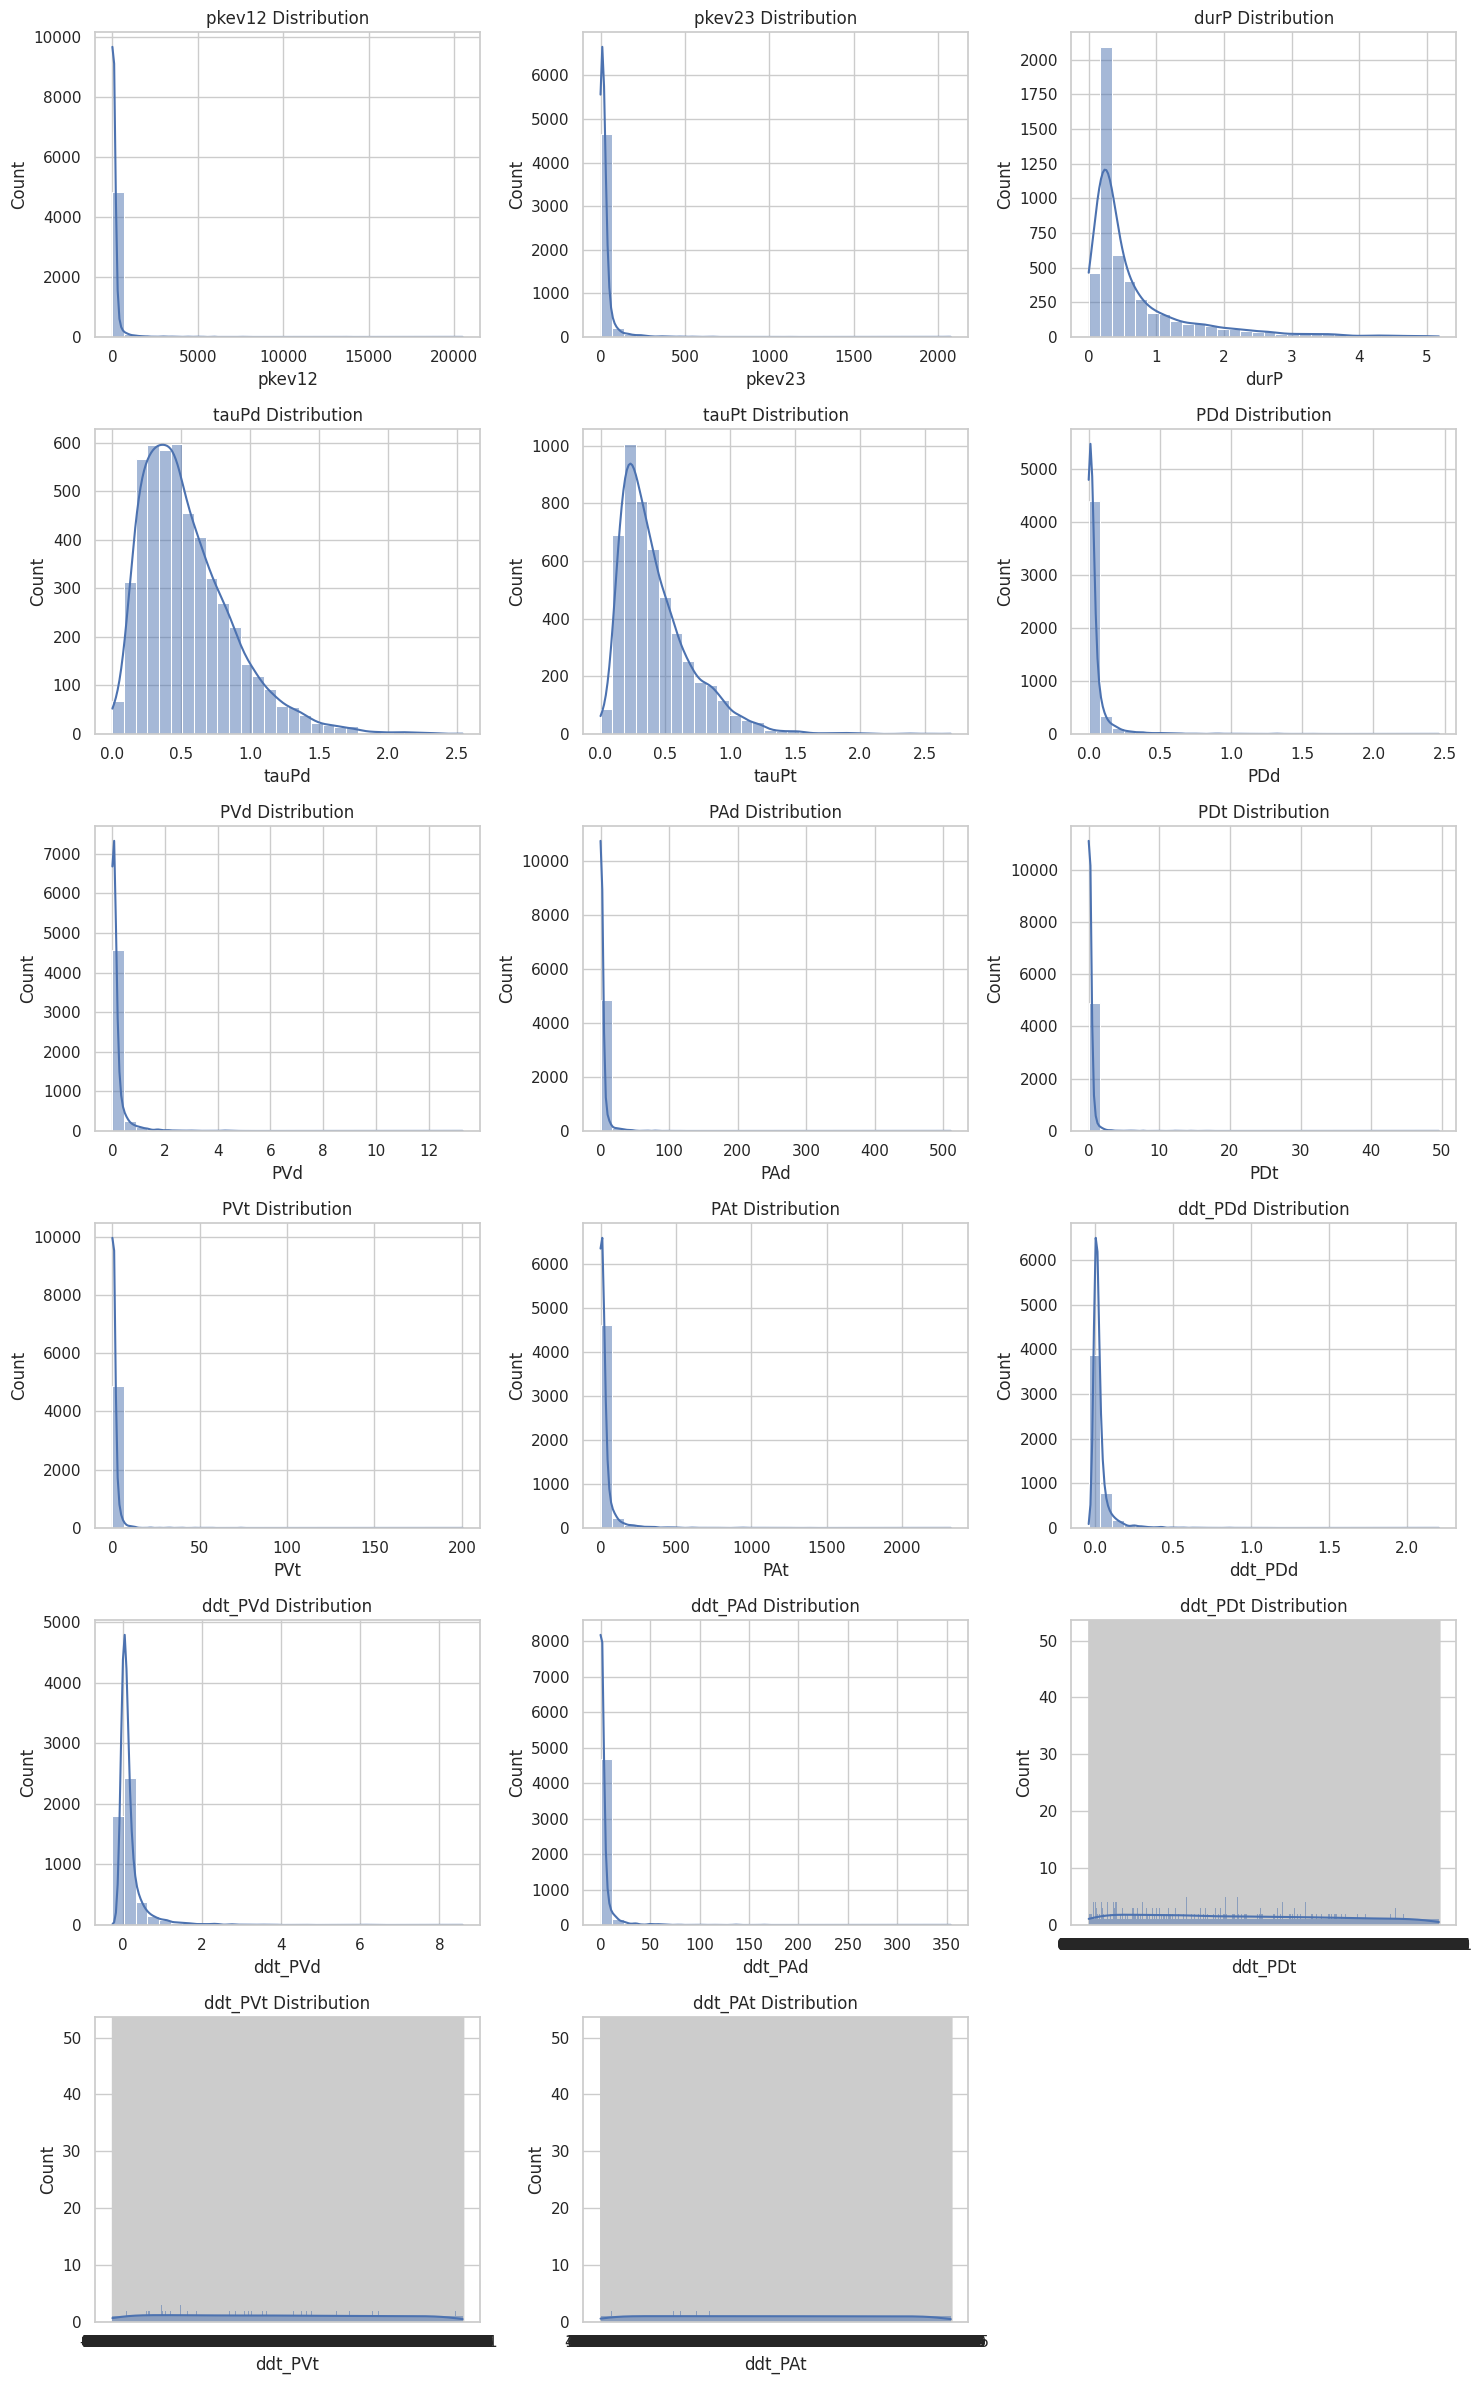

In [27]:
# New figure for histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(plot_data[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{feature} Distribution')

# Remove any extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
